# Introduction

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="./assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours.

In [2]:
colors = pd.read_csv(filepath_or_buffer="./data/colors.csv")

In [5]:
colors["name"].nunique()

135

There are 135 unique colors

In [8]:
colors[colors["is_trans"] == "t"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 31 to 132
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        28 non-null     int64 
 1   name      28 non-null     object
 2   rgb       28 non-null     object
 3   is_trans  28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [9]:
colors[colors["is_trans"] == "f"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        107 non-null    int64 
 1   name      107 non-null    object
 2   rgb       107 non-null    object
 3   is_trans  107 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.2+ KB


There are 28 transparent color and 107 non transparent color

<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [11]:
sets = pd.read_csv(filepath_or_buffer="./data/sets.csv")

In [13]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [14]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [19]:
sets[sets["year"] == sets["year"].min()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


The first lego sets were released in the year 1949 and were called ABB.

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
sets

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [23]:
sets.sort_values(by="num_parts", ascending=False).head(n=5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [55]:
sets.groupby("year")["year"].count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: year, Length: 71, dtype: int64

In 1955 28 sets were released whereas in 2019 840 sets were released

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib.

<AxesSubplot:xlabel='year'>

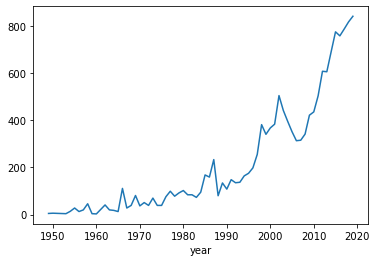

In [70]:
sets.groupby("year")["year"].count().drop([2020, 2021]).plot()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [92]:
sets.groupby("year")["theme_id"].nunique()

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

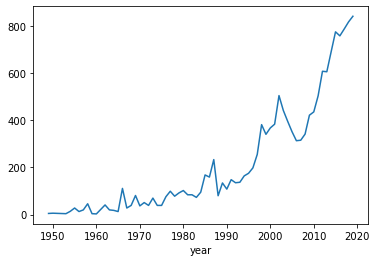

In [94]:
sets.groupby("year")["theme_id"].count().drop([2020, 2021]).plot()
plt.show()

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [100]:
sets.groupby("year")["num_parts"].agg(func=["mean"])

,mean
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


1954 had 12.357143 parts whereas 2017 had 221.840967